In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

import seaborn as sns


In [8]:
ally_data = np.load('uncertain_robot2_trajectories.npy', allow_pickle=True)
adv_data = np.load('uncertain_robot3_trajectories.npy', allow_pickle=True)

number_of_trajectory = len(ally_data)
max_trajectory_length = max(len(lst) for lst in ally_data)

ref_trajectory_length = len(ally_data[0])
ref_ally_trajectory = ally_data[0]
ref_adv_trajectory = adv_data[0]

In [14]:
def get_exact_distribution(lists, element):

    max_length = max(len(lst) for lst in lists)
    arr = np.ma.empty((len(lists), max_length))
    arr.mask = True

    for i, lst in enumerate(lists):
        for j in range(len(lst)):
            arr[i, j] = lst[j][element]
            arr.mask[i,j] = False

    means = arr.mean(axis = 0).data
    std_dev = arr.std(axis = 0).data
    
    return arr, means, std_dev

In [15]:
ally_x_all, ally_x_mean, ally_x_std_dev = get_exact_distribution(lists = ally_data, element = 0)
ally_y_all, ally_y_mean, ally_y_std_dev = get_exact_distribution(lists = ally_data, element = 1)
adv_x_all, adv_x_mean, adv_x_std_dev = get_exact_distribution(lists = adv_data, element = 0)
adv_y_all, adv_y_mean, adv_y_std_dev = get_exact_distribution(lists = adv_data, element = 1)

In [28]:
ally_x_all[:,0].shape

(1001,)

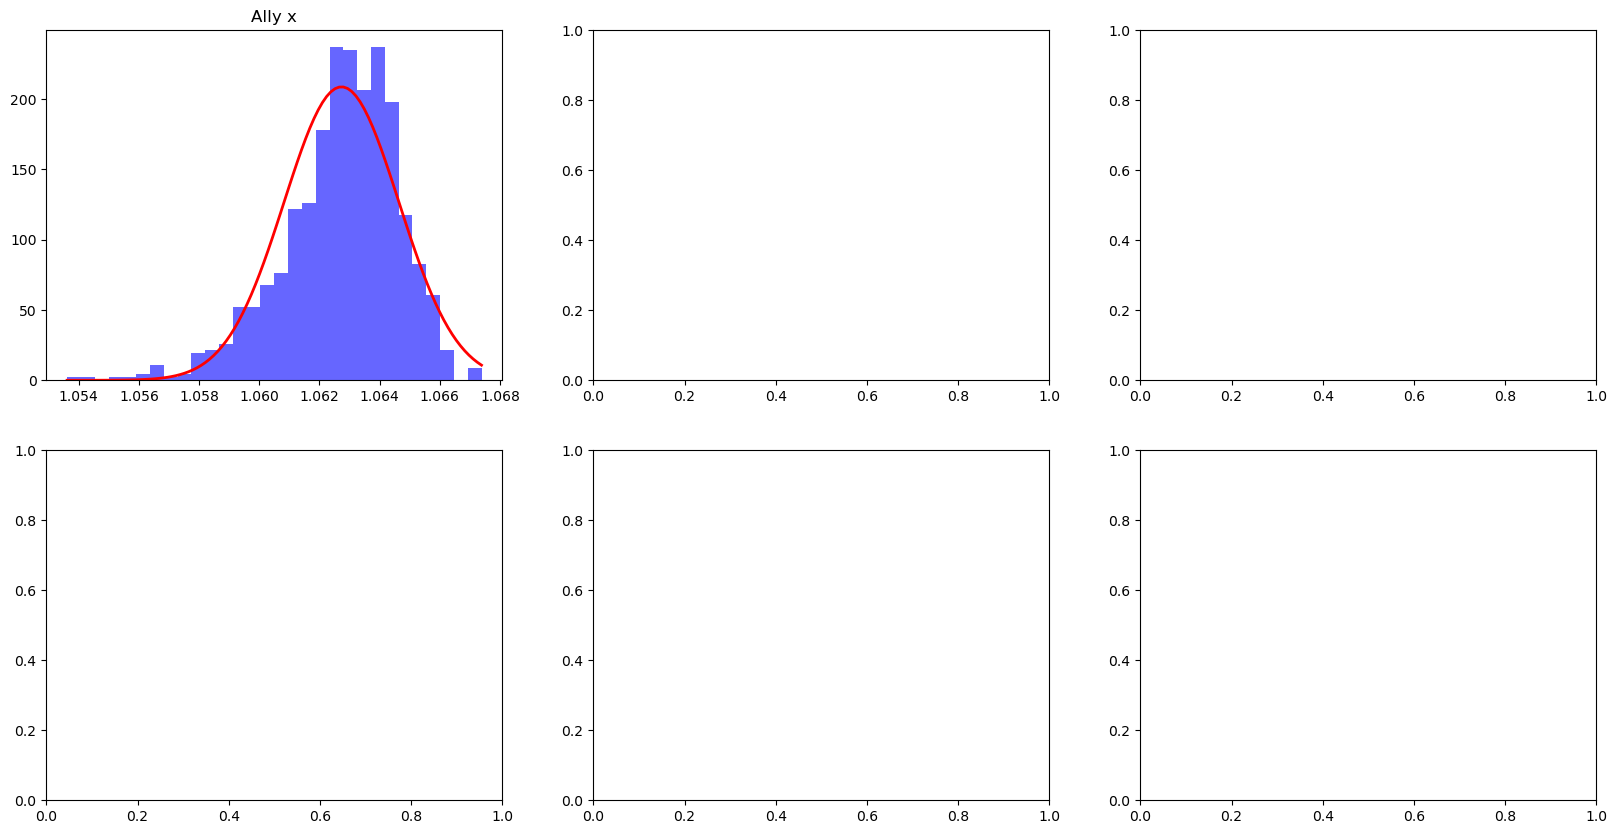

In [35]:
fig, ax = plt.subplots(2,3, figsize = (20,10))
values = ally_x_all[:,0]
ax[0,0].hist(ally_x_all[:,0], bins = 'auto', density= True, alpha = 0.6, color = 'blue', 
                   label = 'Actual Distribution')
ax[0,0].set_title('Ally x')
x = np.linspace(min(values), max(values), 100)

gaussian = stats.norm.pdf(x, ally_x_mean[0], ally_x_std_dev[0])
ax[0,0].plot(x, gaussian, 'r-', lw=2, label = 'Gaussian Approximation')


In [ ]:
def create_std_animation(ally_x, ally_y, adv_x, adv_y):
    fig, ax = plt.subplots(2,3, figsize = (16,10))
    sns.set_style("whitegrid")
    

In [43]:
def calculate_variance(dataset_1, dataset_2):
    mean_1 = np.mean(dataset_1)
    mean_2 = np.mean(dataset_2)

    dataset_1_centered = dataset_1 - mean_1
    dataset_2_centered = dataset_2 - mean_2

    n = len(dataset_1)

    return np.sum(dataset_1_centered * dataset_2_centered) / (n-1)

In [44]:
calculate_variance(ally_x_all[:,0], ally_x_all[:,0])

3.656278187899575e-06

## MZ Formalism for belief states
The full state is $X = [r_x^1, r_y^1, r_x^2, r_y^2]^\intercal$ when there are no uncertainties. When turn to belief states, we define the full state as $b(X) \sim \mathcal{N}([\mu(r_x^1), \mu(r_y^1), \mu(r_x^2), \mu(r_y^2)]^\intercal, \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22}\end{bmatrix})$. <br>
Each variable $r_x^1, r_y^1, r_x^2, r_y^2$ has their own mean value $\mu$, and standard deviation $\sigma$. As a result, the full description of the covariance matrix can be written as:
$$ \begin{bmatrix}
 \sigma(r_x^1) \sigma(r_x^1) & \sigma(r_x^1)\sigma(r_y^1) & \sigma (r_x^1)\sigma(r_x^2) & \sigma (r_x^1) \sigma(r_y^2) \\
 \sigma(r_y^1) \sigma(r_x^1) & \sigma(r_y^1)\sigma(r_y^1) & \sigma (r_y^1)\sigma(r_x^2) & \sigma (r_y^1) \sigma(r_y^2) \\
 \sigma(r_x^2) \sigma(r_x^1) & \sigma(r_x^2)\sigma(r_y^1) & \sigma (r_x^2)\sigma(r_x^2) & \sigma (r_x^2) \sigma(r_y^2) \\
 \sigma(r_y^2) \sigma(r_x^1) & \sigma(r_y^2)\sigma(r_y^1) & \sigma (r_y^2)\sigma(r_x^2) & \sigma (r_y^2) \sigma(r_y^2) \\
 \end{bmatrix}$$

As before, we define the MZ projectors 
$Q = \begin{bmatrix}
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix} $ and 
$P = \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
\end{bmatrix} $, now the 
$Q \cdot b(X) \sim \mathcal{N}(\begin{bmatrix} 0 \\ 0 \\ \mu(r_x^2) \\ \mu(r_y^2) \end{bmatrix} , 
\begin{bmatrix} 
 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 \\
 \sigma(r_x^2) \sigma(r_x^1) & \sigma(r_x^2)\sigma(r_y^1) & \sigma (r_x^2)\sigma(r_x^2) & \sigma (r_x^2) \sigma(r_y^2) \\
 \sigma(r_y^2) \sigma(r_x^1) & \sigma(r_y^2)\sigma(r_y^1) & \sigma (r_y^2)\sigma(r_x^2) & \sigma (r_y^2) \sigma(r_y^2) \\
 \end{bmatrix})$, <br>
and 
$P \cdot b(X) \sim \mathcal{N}(\begin{bmatrix} \mu(r_x^1) \\ \mu(r_y^1) \\ 0 \\ 0 \end{bmatrix} , 
\begin{bmatrix} 
 \sigma(r_x^1) \sigma(r_x^1) & \sigma(r_x^1)\sigma(r_y^1) & \sigma (r_x^1)\sigma(r_x^2) & \sigma (r_x^1) \sigma(r_y^2) \\
 \sigma(r_y^1) \sigma(r_x^1) & \sigma(r_y^1)\sigma(r_y^1) & \sigma (r_y^1)\sigma(r_x^2) & \sigma (r_y^1) \sigma(r_y^2) \\ 
  0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 \\ \end{bmatrix})$

When the states are fixed, the inputs are $[r_x,r_y,u]^\intercal$, beacuse we consider the robot dynamics as $\begin{bmatrix} r_x (k+1) \\ r_y (k+1) \end{bmatrix} = \begin{bmatrix} r_x (k) \\ r_y (k) \end{bmatrix} + v \begin{bmatrix} \cos(u) \\ \sin(u) \end{bmatrix}$, where $u$ is the control input.<br> 
Now we consider the belief state, where the heading angle $u$ has its own mean and standard deviation, need to integrate the two values in the training input as well. <br>
When we consider the heading angle, itself has a distribution of unvertainty because the unvertainty in the dynamics. We now assume that the observation of $u$ by the ego robot has no error. <br>
The training inputs consists: $\mu(r_x^1), \mu(r_y^1),  \sigma(r_x^1) \sigma(r_x^1), \sigma(r_x^1)\sigma(r_y^1), \sigma (r_x^1)\sigma(r_x^2),  \sigma (r_x^1) \sigma(r_y^2), 
 \sigma(r_y^1) \sigma(r_x^1),  \sigma(r_y^1)\sigma(r_y^1),  \sigma (r_y^1)\sigma(r_x^2),  \sigma (r_y^1) \sigma(r_y^2), \mu(u^1), \sigma(u^1)$

It's too complex, I choose to use sympy.

# Next Steps 11/14
1. Traing the LSTM network using only the mean value of the coordinates.
2. Find ways to estimate the propogation of the variances of the adversarial agent.
3. Find out how other research papers formulate the problem regarding the mean, variances, POMDP etc.


$\frac{\partial{\phi_j (x,t)}}{\partial t} = R_j(\hat{\phi}(x,t)) + \int_0^t K_j (\hat{\phi}(x, t-s),s)ds + F_j(x,t)$. 